# AI in Finance Week 07: Home Assignment

## 1 Imports

In [73]:
#  basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing

In [177]:
#  data
zopa_data = pd.read_csv("../data/zopa_students.csv").set_index('Unnamed: 0')

In [178]:
zopa_data.describe()

,default,return,amount,term,time,rate,August,December,February,January,...,RG12,RH10,SE18,SL6,ST5,SW16,SW19,WA5,WA7,WA8
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.00000
mean,0.006400,0.060096,8.422292,38.854600,3894.185000,0.087655,0.083200,0.069000,0.081800,0.093600,...,0.002400,0.001400,0.00100,0.001400,0.001400,0.00100,0.001400,0.00100,0.001400,0.00100
std,0.079752,0.043648,0.809245,15.905862,916.472169,0.055885,0.276212,0.253479,0.274087,0.291301,...,0.048936,0.037394,0.03161,0.037394,0.037394,0.03161,0.037394,0.03161,0.037394,0.03161
min,0.000000,0.002700,5.703782,6.000000,72.000000,0.020000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000
25%,0.000000,0.030000,7.886081,24.000000,3447.000000,0.049775,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000
50%,0.000000,0.044900,8.517193,36.000000,4066.500000,0.071100,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000
75%,0.000000,0.074600,9.000236,60.000000,4518.000000,0.108000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000
max,1.000000,0.286100,10.298566,60.000000,5478.000000,0.327000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000


## 2 Variables' Description

This is a dataset of a sample of consumer loans (P2P loans) from ZOPA. The variables are:
date.start - the date when the loan originated (started)
date.end   - the date when the loan ended
default    - 1 if the borrower defaulted on loan and 0 otherwise
return     - is the returna achieved on the loan by the lender in [% p.a.]
aumount    - is the ln of the size of the loan
term       - it's the time in months for the duration of the loan
time       - it's the time in days since the first observation in the dataset
rate       - it's the annualized interest rate on the loans
....       - calendar effects with 1 for the loan originated in that given monthand 0 otherwise
pastRet    - the amount of p.a. return the lender achieved with the same customer.
....       - remaining variables are variables related to a specific region - DO NOT USE THOSE!

The goal is to design a prediction model that will predict the returns of on the loan. Think about
variables that you will use. You can also create your own variables. Your graded tasks are as follows:
1) Prepare a table with descriptive statistics and correlations for key variables (not necessarily all) that enter your model.
2) Propose at least 4 models to predict returns.
3) Evaluate models and suggest which approach to use in future. Explain your recommendation.
Report and describe your results in MS WORD.
Apart from fulfilling the goal, you will be evaluated based on following criteria:
- if you submit a working code along your explanations.
- if you present Figures as well.
- if you select different types of models, but 4 is enough.
- if you evaluate your models using an MCS test.
- if you use multiple loss functions.
- if you interpret your results correctly.
- if you create your own variables and consider different transformations.

Show all columns

In [75]:
for col in zopa_data.columns:
    print(col)

date.start
date.end
default
return
amount
term
time
rate
August
December
February
January
July
June
March
May
November
October
September
pastDef
pastRet
PC.AB
PC.AL
PC.B
PC.BA
PC.BB
PC.BD
PC.BF
PC.BH
PC.BL
PC.BN
PC.BR
PC.BS
PC.BT
PC.CA
PC.CB
PC.CF
PC.CH
PC.CM
PC.CO
PC.CR
PC.CT
PC.CV
PC.CW
PC.DA
PC.DD
PC.DE
PC.DG
PC.DH
PC.DL
PC.DN
PC.DT
PC.DY
PC.E
PC.EC
PC.EH
PC.EN
PC.EX
PC.FK
PC.FY
PC.G
PC.GL
PC.GU
PC.HA
PC.HD
PC.HG
PC.HP
PC.HR
PC.HS
PC.HU
PC.HX
PC.IG
PC.IP
PC.IV
PC.KA
PC.KT
PC.KW
PC.KY
PC.L
PC.LA
PC.LD
PC.LE
PC.LL
PC.LN
PC.LS
PC.LU
PC.M
PC.ME
PC.MK
PC.ML
PC.N
PC.NE
PC.NG
PC.NH
PC.NN
PC.NP
PC.NR
PC.NW
PC.OL
PC.OX
PC.PA
PC.PE
PC.PH
PC.PL
PC.PO
PC.PR
PC.RG
PC.RH
PC.RM
PC.RUNC
PC.S
PC.SA
PC.SE
PC.SG
PC.SK
PC.SL
PC.SM
PC.SN
PC.SO
PC.SP
PC.SR
PC.SS
PC.ST
PC.SW
PC.SY
PC.TA
PC.TD
PC.TF
PC.TN
PC.TQ
PC.TR
PC.TS
PC.TW
PC.UB
PC.W
PC.WA
PC.WC
PC.WD
PC.WF
PC.WN
PC.WR
PC.WS
PC.WV
PC.YO
PC.ZE
B77
BN1
BN3
BS16
CR0
CV6
DA1
E14
E17
EH54
FK2
GU14
KY11
LE12
LE2
LE3
LE4
LE67
LN6
LU7
ML1
NG17
NG5
PR2
PR7
RG

Drop unused columns

In [179]:
zopa_data = zopa_data.iloc[:,:zopa_data.columns.get_loc("PC.AB")]

In [180]:
zopa_data.describe()

,default,return,amount,term,time,rate,August,December,February,January,July,June,March,May,November,October,September,pastDef,pastRet
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000
mean,0.006400,0.060096,8.422292,38.854600,3894.185000,0.087655,0.083200,0.069000,0.081800,0.093600,0.08680,0.081600,0.082600,0.084600,0.086200,0.096000,0.083400,0.0,0.006430
std,0.079752,0.043648,0.809245,15.905862,916.472169,0.055885,0.276212,0.253479,0.274087,0.291301,0.28157,0.273782,0.275304,0.278313,0.280687,0.294621,0.276514,0.0,0.021008
min,0.000000,0.002700,5.703782,6.000000,72.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.030000,7.886081,24.000000,3447.000000,0.049775,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.044900,8.517193,36.000000,4066.500000,0.071100,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.074600,9.000236,60.000000,4518.000000,0.108000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.000000,0.286100,10.298566,60.000000,5478.000000,0.327000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.269100


In [184]:
print(zopa_data.groupby('default').mean().transpose())

default              0            1
return        0.060261     0.034513
amount        8.421999     8.467807
term         38.839171    41.250000
time       3895.543277  3683.312500
rate          0.087288     0.144581
August        0.083333     0.062500
December      0.068438     0.156250
February      0.081723     0.093750
January       0.093599     0.093750
July          0.087158     0.031250
June          0.081119     0.156250
March         0.082327     0.125000
May           0.084742     0.062500
November      0.086151     0.093750
October       0.096216     0.062500
September     0.083736     0.031250
pastDef       0.000000     0.000000
pastRet       0.006445     0.004047


C:\Users\A200083283\AppData\Local\Temp\ipykernel_18444\2906771016.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(zopa_data.groupby('default').mean().transpose())


<AxesSubplot:xlabel='return', ylabel='rate'>

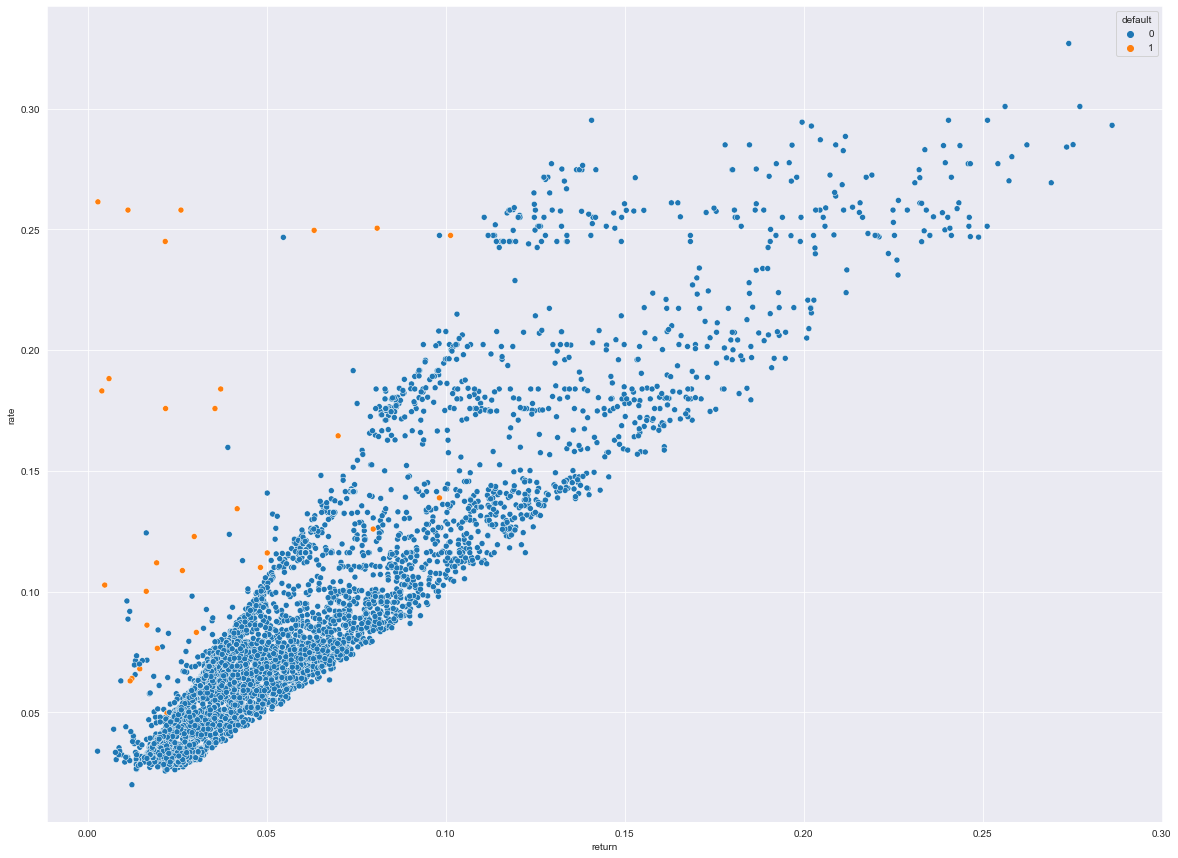

In [80]:
sns.scatterplot(data=zopa_data, x='return', y='rate', hue='default' )

In [69]:
zopa_data = zopa_data.drop(['January', 'February', 'March', 'May', 'June', 'July',
                'August', 'September', 'October', 'November'], axis=1)

KeyError: "['January', 'February', 'March', 'May', 'June', 'July', 'August', 'September', 'October', 'November'] not found in axis"

In [70]:
zopa_data

,default,return,amount,term,time,rate,December,pastDef,pastRet,duration
0,0,0.0305,8.709465,60,4935,0.0312,0,0,0.0000,104
1,0,0.0633,10.138560,60,4085,0.0670,0,0,0.0768,199
2,0,0.0230,8.316300,36,3192,0.0450,0,0,0.0000,1119
3,0,0.0178,9.217316,36,3496,0.0347,0,0,0.0000,1128
4,0,0.0700,7.047517,36,3925,0.0842,1,0,0.0000,379
...,...,...,...,...,...,...,...,...,...,...
4995,0,0.0439,8.328451,24,3965,0.0874,0,0,0.0000,732
4996,0,0.0261,8.634087,36,3251,0.0510,0,0,0.0000,1116
4997,0,0.0938,8.517193,60,3623,0.1628,0,0,0.0000,1365
4998,0,0.1161,7.640123,24,3857,0.2450,0,0,0.0000,732


Our data contains dates. Further I create a new variable from the original dates

In [153]:
def get_duration_from_dates(df=zopa_data, cols=['date.start', 'date.end']):

    for col in cols:
        df[col] = pd.to_datetime(df[col], format="%Y-%m-%d")
    df['duration'] = df[cols[1]] - df[cols[0]]
    df['duration'] = df['duration'].dt.days
    df = df.drop(cols, axis=1)
    df = df.reset_index(drop=True)

    return df

In [154]:
zopa_data = get_duration_from_dates()

Further I plot relationships between our variables using paiplot

In [28]:
def standardize_test_set(test_series, train_series):
    z = []

    for ix in train_series:
        z.append((ix - test_series.mean())/test_series.std())

    return z

In [29]:
from sklearn.model_selection import train_test_split
y_train, y_test, X_train, X_test = train_test_split(zopa_data['default'], zopa_data.drop('default', axis=1), test_size=0.2)

In [37]:
for elem in [y_train, y_test]:
    print(elem.describe(), "\n")

count    4000.000000
mean        0.006000
std         0.077237
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default, dtype: float64 

count    1000.000000
mean        0.008000
std         0.089129
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default, dtype: float64 



<AxesSubplot:>

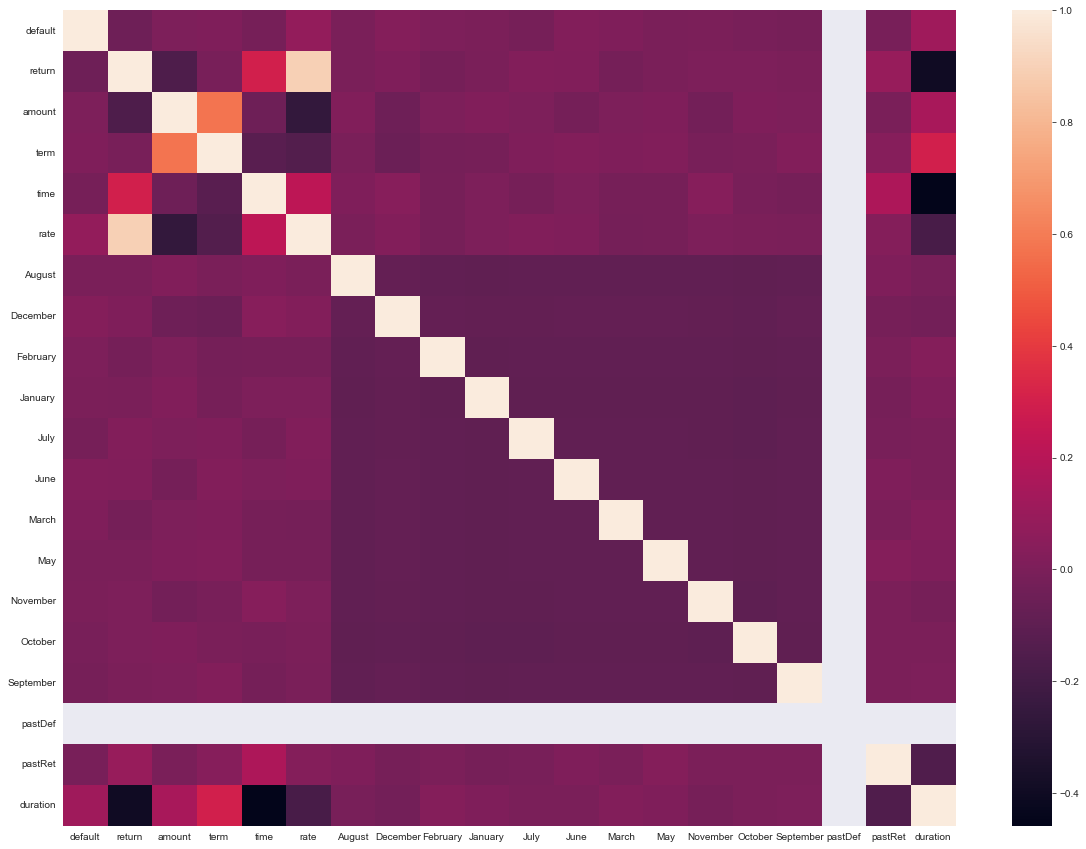

In [38]:
plt.rcParams["figure.figsize"] = (20,15)
sns.heatmap(zopa_data.corr())

## 2 Models list

In [140]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV

In [141]:
from AI.util import MCS

In [171]:
models = {
    "m1_ada": AdaBoostClassifier(DecisionTreeClassifier()),
    "m2_rforr": RandomForestClassifier(),
    "m3_bag": BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10),
    "m4_tree": DecisionTreeClassifier(),
    "m5_reg": LogisticRegressionCV()
}

In [172]:
models_fit = {}
for key, mod in models.items():
    models_fit[key] = mod.fit(X_train[['return', 'rate', 'pastRet']], y_train)

In [173]:
models_pred = {}
for mod, fit in models_fit.items():
    models_pred[mod] = fit.predict(X_test[['return', 'rate', 'pastRet']])

In [174]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_percentage_error as mape
models_loss = {}
for mod, pred in models_pred.items():
    models_loss[mod] = [mse(pred, y_test), mape(pred, y_test)]

In [176]:
err_metrics = pd.DataFrame(models_loss)
err_metrics.index = ['mse', 'mape']
err_metrics

,m1_ada,m2_rforr,m3_bag,m4_tree,m5_reg
mse,6.000000e-03,7.000000e-03,8.000000e-03,6.000000e-03,7.000000e-03
mape,2.702160e+13,3.152520e+13,3.602880e+13,2.702160e+13,3.152520e+13


In [164]:
melted = pd.melt(pd.DataFrame(models_pred, y_test).reset_index(), id_vars='default')
melted['value'] = melted['value'] + np.random.randn(melted.shape[0])/50
melted['default'] = melted['default'] + np.random.randn(melted.shape[0])/50

<AxesSubplot:xlabel='value', ylabel='default'>

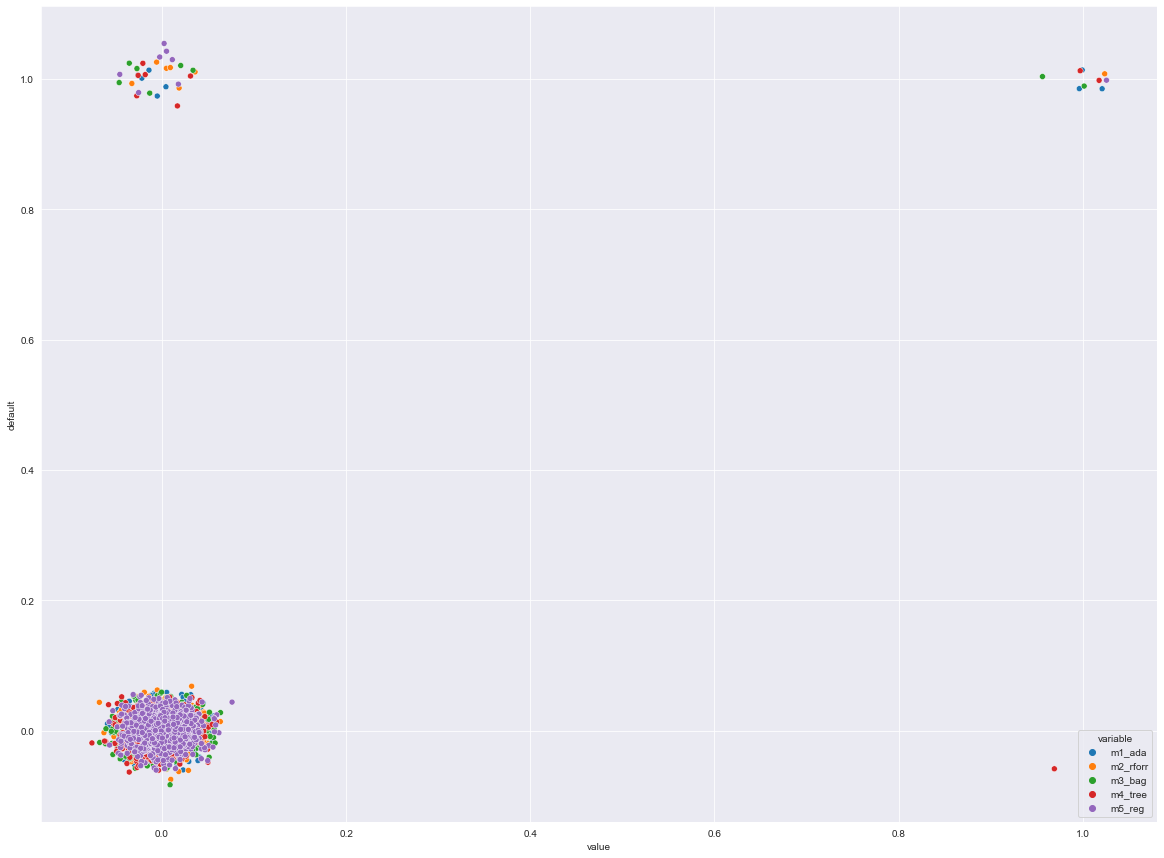

In [165]:
sns.scatterplot(data=melted, y='default', x='value', hue='variable')

## 3 MCS

In [25]:
from AI.util import MCS

In [26]:
mcs = MCS.ModelConfidenceSet(zopa_data, 0.1, 3, 10000).run()

In [27]:
mcs